## Imports

In [104]:
import pandas as pd
import sys

sys.path.insert(0,'../satori')

from postprocess import *

## Interaction data processing

In [136]:
exp_name = "../results/human_promoters/fhd/adam/E3/Interactions_SATORI/interactions_summary_attnLimit-0.09919409446793113.txt"

In [137]:
# For SATORI based interactions
df,suffix = pd.read_csv(exp_name,sep='\t'),'SATORI'
##df = pd.read_csv('../results/Human_Promoter_Analysis_euclidean_v8/Interactions_SATORI/interactions_summary_attnLimit-0.04.txt',sep='\t')

# For FIS based interactions
#df,suffix = pd.read_csv('../results/Human_Promoter_Analysis_euclidean_v8/Interactions_FIS/interactions_summary_attnLimit-50.0.txt',sep='\t'),'FIS'
##df = pd.read_csv('../results/Human_Promoter_Analysis_euclidean_v8_fixed/Interactions_FIS/interactions_summary_attnLimit-0.txt',sep='\t')

### Filter based on interaction and motif hit p-values, and keep the most significant interactions

In [138]:
df = filter_data_on_thresholds(df, motifA_pval_cutoff=0.05, motifB_pval_cutoff=0.05)

In [140]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
505,filter9<-->filter33,1778,M0436_1.02,0.025992,M0608_1.02,0.003359,378.0,228.0,124.0,104.0,0.000032,0.039335
1204,filter17<-->filter33,3262,M0437_1.02,0.032468,M0608_1.02,0.003359,408.0,24.0,90.0,185.0,0.000043,0.042792
3294,filter52<-->filter67,9036,M0609_1.02,0.000584,M0608_1.02,0.013925,6.0,204.0,300.0,124.0,0.000043,0.042792
3708,filter58<-->filter138,9968,M1110_1.02,0.026777,M0408_1.02,0.009027,198.0,288.0,243.0,194.0,0.000002,0.009075
4039,filter63<-->filter106,10626,M0609_1.02,0.003054,M0608_1.02,0.000298,294.0,192.0,322.0,203.0,0.000005,0.014585


In [141]:
df.shape

(5, 12)

### Load the motif description file to annotate the interactions. 
Here we use CISBP (U toronto) motif description file. 

In [142]:
df_annotate = pd.read_csv('/s/jawar/i/nobackup/Saira/latest/satori_v2/TF_info/TF_Information_all_motifs.txt',sep='\t')

/tmp/ipykernel_1484340/1523184318.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_annotate = pd.read_csv('/s/jawar/i/nobackup/Saira/latest/satori_v2/TF_info/TF_Information_all_motifs.txt',sep='\t')


In [143]:
df_annotate.head()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Year,PMID,MSource_Version,SR_Model,SR_NoThreshold,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T000001_2.00,F001_2.00,TS12_2.00,.,.,BRADI2G60554,BRADI2G60554,Brachypodium_distachyon,N,"ABF1,B3",...,.,.,.,SequenceIdentity,True,Ensembl,http://www.ensembl.org/,2018,Dec,8
1,T000002_2.00,F001_2.00,TS12_2.00,.,.,LPERR05G06870,LPERR05G06870,Leersia_perrieri,N,"ABF1,B3",...,.,.,.,SequenceIdentity,True,Ensembl,http://www.ensembl.org/,2018,Dec,8
2,T000003_2.00,F002_2.00,TS04_2.00,.,.,CPAG_02544,CPAG_02544,Candida_parapsilosis,N,ABF1,...,.,.,.,SequenceIdentity,True,Broad,http://www.broadinstitute.org/,2016,May,1
3,T000004_2.00,F002_2.00,TS04_2.00,.,.,PTSG_00627,PTSG_00627,Salpingoeca_rosetta,N,ABF1,...,.,.,.,SequenceIdentity,True,Broad,http://www.broadinstitute.org/,2016,May,1
4,T000005_2.00,F002_2.00,TS04_2.00,.,.,WUBG_06707,WUBG_06707,Wuchereria_bancrofti,N,ABF1,...,.,.,.,SequenceIdentity,True,Broad,http://www.broadinstitute.org/,2016,May,1


In [144]:
fhd_file = "/s/jawar/p/nobackup/altsplice1/fahad/DeepLearning/Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt"
df2_annotate = pd.read_csv(fhd_file, sep='\t')

In [145]:
df2_annotate.head()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T004843_1.02,F035_1.02,TS19_1.02,M2938_1.02,MS26_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,Transfac,Matys,2006,16381825,2014.2,Ensembl,http://www.ensembl.org/,2011,Oct,26
1,T004843_1.02,F035_1.02,TS19_1.02,M5917_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T004843_1.02,F035_1.02,TS19_1.02,M5918_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T004843_1.02,F035_1.02,TS19_1.02,M5919_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T004843_1.02,F035_1.02,TS19_1.02,M6144_1.02,MS18_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,HocoMoco,Kulakovskiy,2013,23175603,July 2014,Ensembl,http://www.ensembl.org/,2011,Oct,26


In [12]:
#df_annotate[df_annotate["TF_Name"] == "CTCF"][df_annotate["TF_Species"] == "Homo_sapiens"]

In [26]:
df2_annotate[df2_annotate["Motif_ID"] == "M4459_1.02"]


,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
1170,T044306_1.02,F115_1.02,TS19_1.02,M4459_1.02,MS13_1.02,ENSG00000120738,EGR1,Homo_sapiens,D,C2H2 ZF,...,ChIP-seq,Gerstein,2012,22955619,January 2011,Ensembl,http://www.ensembl.org/,2011,Oct,26


### Annotate the interacting motifs

In [110]:
df['TF1'] = df['motif1'].apply(get_annotation, annotation_data=df2_annotate, single_TF=True)
df['TF2'] = df['motif2'].apply(get_annotation, annotation_data=df2_annotate, single_TF=True)

In [111]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2
681,filter8<-->filter44,1599,M0891_1.02,0.016848,M6442_1.02,0.007496,120.0,240.0,184.0,197.0,1.543904e-04,0.037917,TLX2,PURA
1121,filter22<-->filter44,4168,M0942_1.02,0.002521,M6442_1.02,0.007496,36.0,198.0,293.0,181.0,2.482934e-08,0.000044,IRX4,PURA
2077,filter44<-->filter54,7819,M6442_1.02,0.007496,M0891_1.02,0.006606,42.0,474.0,176.0,198.0,3.068973e-06,0.001744,PURA,TLX2
2082,filter44<-->filter62,7827,M6442_1.02,0.007496,M0942_1.02,0.016708,174.0,30.0,256.0,224.0,1.006981e-06,0.000770,PURA,IRX4
2086,filter44<-->filter70,7835,M6442_1.02,0.007496,M4459_1.02,0.000340,294.0,198.0,291.0,149.0,1.389106e-08,0.000031,PURA,EGR1


In [112]:
df['TF_Interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

### Drop same motif interactions

In [113]:
df = df[df['TF1']!=df['TF2']]

In [114]:
df.shape

(19, 15)

In [115]:
df = df.reset_index(drop=True)

### Fix redundant interaction pairs

In [116]:
df = process_for_redundant_interactions(df, intr_type='TF')

In [117]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction
0,filter8<-->filter44,1599,M0891_1.02,0.016848,M6442_1.02,0.007496,120.0,240.0,184.0,197.0,1.543904e-04,0.037917,TLX2,PURA,TLX2$\longleftrightarrow$PURA
1,filter22<-->filter44,4168,M0942_1.02,0.002521,M6442_1.02,0.007496,36.0,198.0,293.0,181.0,2.482934e-08,0.000044,IRX4,PURA,IRX4$\longleftrightarrow$PURA
2,filter44<-->filter54,7819,M6442_1.02,0.007496,M0891_1.02,0.006606,42.0,474.0,176.0,198.0,3.068973e-06,0.001744,PURA,TLX2,TLX2$\longleftrightarrow$PURA
3,filter44<-->filter62,7827,M6442_1.02,0.007496,M0942_1.02,0.016708,174.0,30.0,256.0,224.0,1.006981e-06,0.000770,PURA,IRX4,IRX4$\longleftrightarrow$PURA
4,filter44<-->filter70,7835,M6442_1.02,0.007496,M4459_1.02,0.000340,294.0,198.0,291.0,149.0,1.389106e-08,0.000031,PURA,EGR1,PURA$\longleftrightarrow$EGR1


In [118]:
df.shape

(19, 15)

## Most Frequent TF Family Interactions

In [119]:
tf_family_dict = {}
for TF in df2_annotate['TF_Name']:
    tf_family_dict[TF] = df2_annotate[df2_annotate['TF_Name']==TF]['Family_Name'].iloc[0]
df['TF1_Family'] = df['TF1'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')
df['TF2_Family'] = df['TF2'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [120]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [121]:
df = process_for_redundant_interactions(df, intr_type='Family')

In [122]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter8<-->filter44,1599,M0891_1.02,0.016848,M6442_1.02,0.007496,120.0,240.0,184.0,197.0,1.543904e-04,0.037917,TLX2,PURA,TLX2$\longleftrightarrow$PURA,Homeodomain,Unknown,Homeodomain$\longleftrightarrow$Unknown
1,filter22<-->filter44,4168,M0942_1.02,0.002521,M6442_1.02,0.007496,36.0,198.0,293.0,181.0,2.482934e-08,0.000044,IRX4,PURA,IRX4$\longleftrightarrow$PURA,Homeodomain,Unknown,Homeodomain$\longleftrightarrow$Unknown
2,filter44<-->filter54,7819,M6442_1.02,0.007496,M0891_1.02,0.006606,42.0,474.0,176.0,198.0,3.068973e-06,0.001744,PURA,TLX2,TLX2$\longleftrightarrow$PURA,Unknown,Homeodomain,Homeodomain$\longleftrightarrow$Unknown
3,filter44<-->filter62,7827,M6442_1.02,0.007496,M0942_1.02,0.016708,174.0,30.0,256.0,224.0,1.006981e-06,0.000770,PURA,IRX4,IRX4$\longleftrightarrow$PURA,Unknown,Homeodomain,Homeodomain$\longleftrightarrow$Unknown
4,filter44<-->filter70,7835,M6442_1.02,0.007496,M4459_1.02,0.000340,294.0,198.0,291.0,149.0,1.389106e-08,0.000031,PURA,EGR1,PURA$\longleftrightarrow$EGR1,Unknown,C2H2 ZF,Unknown$\longleftrightarrow$C2H2 ZF


In [91]:
df['filter_interaction'] = df['filter_interaction'].apply(lambda x: x.replace('<-->',r'$\longleftrightarrow$'))

In [92]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter2$\longleftrightarrow$filter67,461,M0891_1.02,0.000938,M0609_1.02,0.018144,36.0,198.0,342.0,282.0,5.082589e-04,0.040736,TLX2,DNMT1,TLX2$\longleftrightarrow$DNMT1,Homeodomain,CxxC,Homeodomain$\longleftrightarrow$CxxC
1,filter7$\longleftrightarrow$filter14,1378,M6483_1.02,0.000131,M6482_1.02,0.010460,6.0,42.0,328.0,135.0,2.288124e-04,0.021828,SP4,SP7,SP4$\longleftrightarrow$SP7,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF
2,filter7$\longleftrightarrow$filter15,1379,M6483_1.02,0.000131,M0609_1.02,0.011875,102.0,78.0,354.0,163.0,3.372806e-07,0.000137,SP4,DNMT1,SP4$\longleftrightarrow$DNMT1,C2H2 ZF,CxxC,C2H2 ZF$\longleftrightarrow$CxxC
3,filter7$\longleftrightarrow$filter27,1391,M6483_1.02,0.000131,M0609_1.02,0.039545,102.0,384.0,379.0,175.0,1.422019e-07,0.000071,SP4,DNMT1,SP4$\longleftrightarrow$DNMT1,C2H2 ZF,CxxC,C2H2 ZF$\longleftrightarrow$CxxC
4,filter7$\longleftrightarrow$filter40,1404,M6483_1.02,0.000131,M0609_1.02,0.004897,138.0,480.0,282.0,117.0,2.890278e-05,0.004522,SP4,DNMT1,SP4$\longleftrightarrow$DNMT1,C2H2 ZF,CxxC,C2H2 ZF$\longleftrightarrow$CxxC


In [57]:
df.to_csv(f'output/Human-Promoter_interactions_relative_ns_{suffix}.csv')

### Distribution of individual TF or TF family interactions

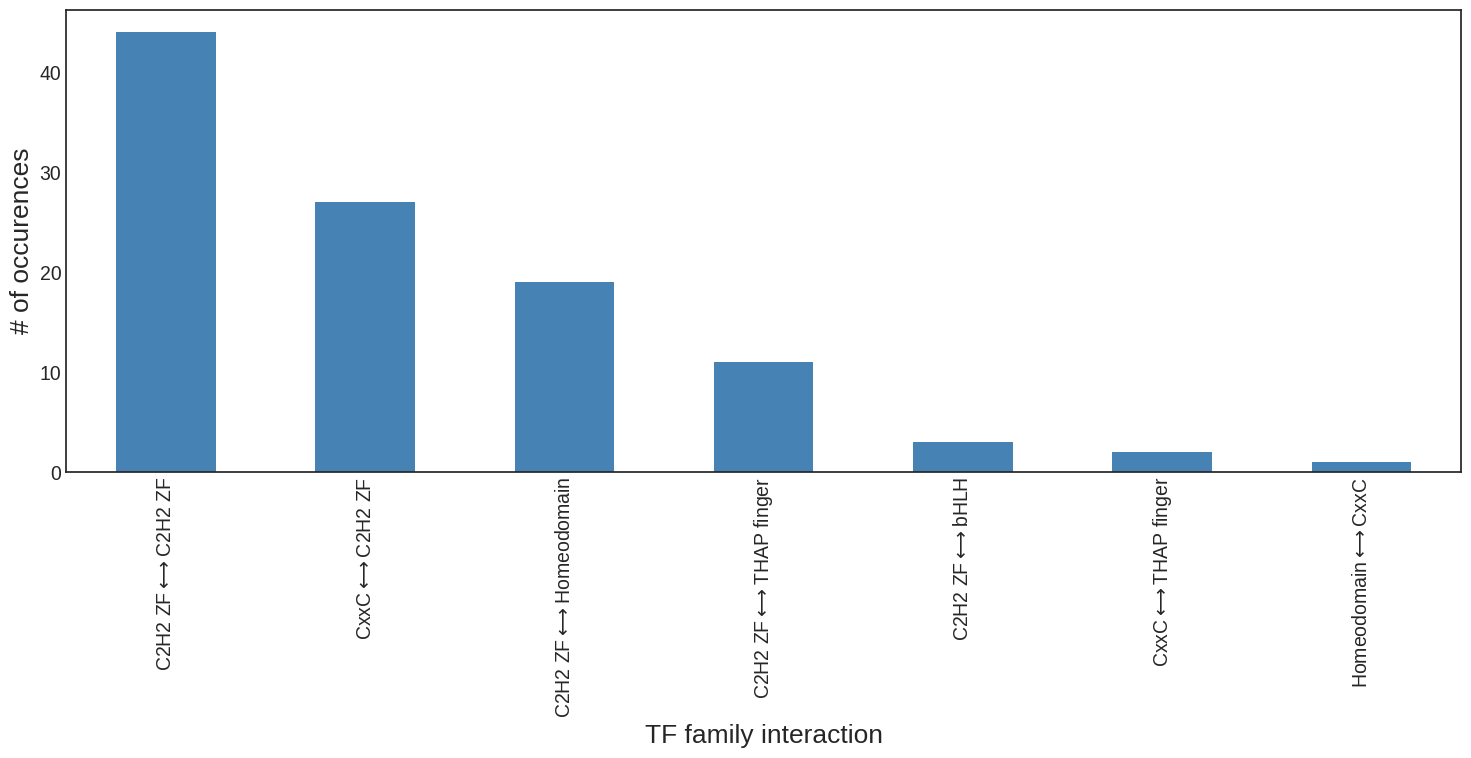

In [58]:
plot_frequent_interactions(df, intr_level='Family_Interaction', first_n=15, store_pdf_path=f'output/Human_rel_attn_TF-Fams_supp_{suffix}.pdf')

### Plot interaction distance distribution

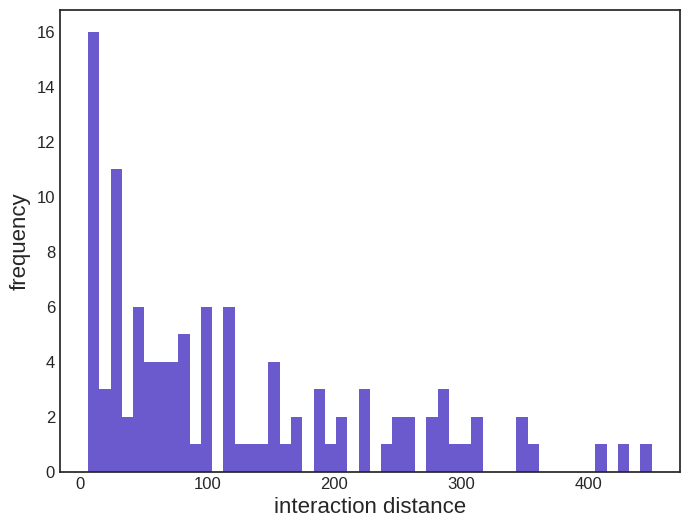

In [59]:
plot_interaction_distance_distribution(df, nbins=50, fig_size=(8,6))

In [105]:
df['mean_distance'].mean(), df['mean_distance'].median()

(183.23387096774192, 150.0)

### Most frequent interactions and their respective interaction distances

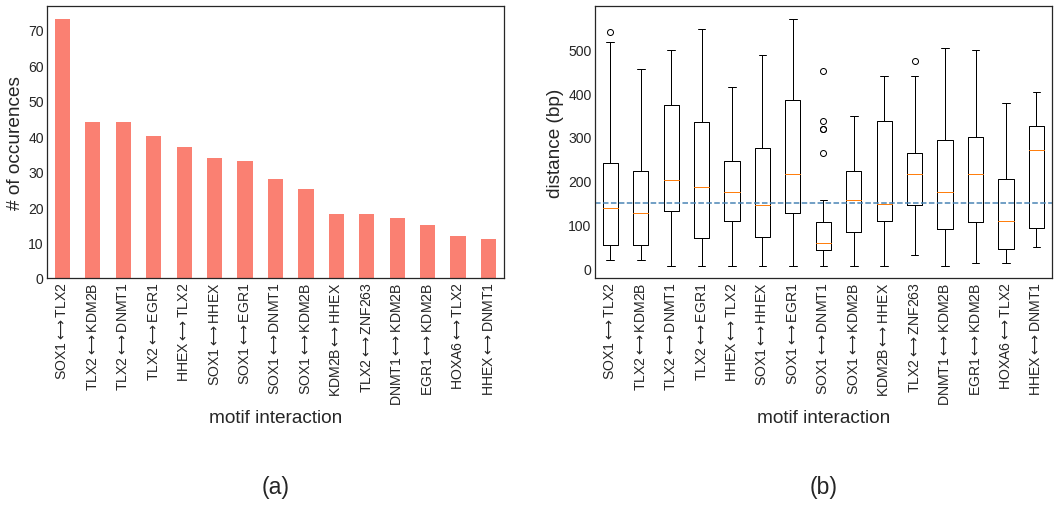

In [106]:
plot_interactions_and_distances_boxplot(df, first_n=15, sort_distances=False, add_sub_caption=True, show_median_dist=True, store_pdf_path=f'output/human_promoter_main_distance_boxplot_{suffix}.pdf')

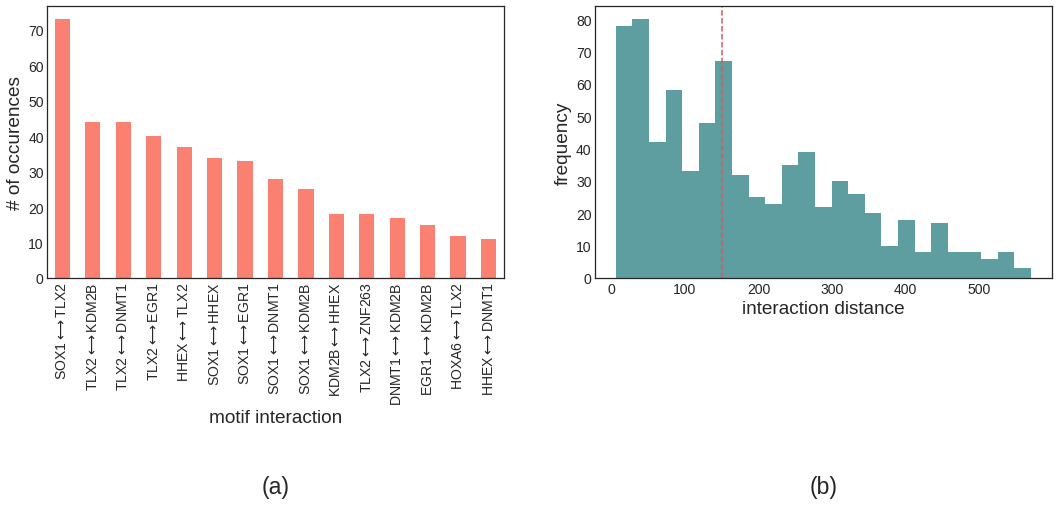

In [107]:
plot_interactions_and_distances_histogram(df, first_n=15, dist_nbins=25, add_sub_caption=True, show_median_dist=True, store_pdf_path=f'output/human_promoter_main_distance_histogram_{suffix}.pdf')

### Annotate Interactions using TRRUSTv2 (and other sources)

#### Read TRRUSTv2 interactions

In [123]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/i/nobackup/Saira/motif_databases/Human_Chromatin/TrustV2/human_co-regulate_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

In [124]:
df['Interaction_in_TRUSTv2'] = df['TF_Interaction'].apply(db_annotate_interaction, intr_dict = human_dict)

In [125]:
df_resTRUSTv2 = df[df['Interaction_in_TRUSTv2']==1]

In [126]:
df_resTRUSTv2x = df_resTRUSTv2[['TF_Interaction','TF1_Family','TF2_Family','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_Interaction')

In [127]:
df_resTRUSTv2x

,TF_Interaction,TF1_Family,TF2_Family,adjusted_pval
4,PURA$\longleftrightarrow$EGR1,Unknown,C2H2 ZF,0.000031
8,PURA$\longleftrightarrow$ESR1,Unknown,Nuclear receptor,0.005072


In [65]:
df_resTRUSTv2x.to_csv(f'output/Human_ATTN_TRRUSTv2_relative_ns_{suffix}.csv')

### Annotate Interactions using HIPPIE database

#### Read hippie interactions

In [128]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/i/nobackup/Saira/motif_databases/Human_Chromatin/hippie/interactions_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

In [129]:
for key,value in human_dict.items():
    human_dict[key] = np.array([[val, '', '0'] for val in value])

In [130]:
df['Interaction_in_HIPPIE'] = df['TF_Interaction'].apply(db_annotate_interaction, intr_dict = human_dict)

In [131]:
df_resHIPPIE = df[df['Interaction_in_HIPPIE']==1]

In [132]:
df_resHIPPIEx = df_resHIPPIE[['TF_Interaction','TF1_Family','TF2_Family','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_Interaction')

In [133]:
df_resHIPPIEx

,TF_Interaction,TF1_Family,TF2_Family,adjusted_pval
4,PURA$\longleftrightarrow$EGR1,Unknown,C2H2 ZF,0.000031
8,PURA$\longleftrightarrow$ESR1,Unknown,Nuclear receptor,0.005072


In [72]:
df_resHIPPIEx.to_csv(f'output/Human_ATTN_HIPPIE_{suffix}.csv')